In [1]:
import pandas as pd

In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

from src import load_dataset, get_features_and_target, create_train_test_split


In [3]:
# Test the flow
path = "../data/cleaned_data/final_dataset.csv"

df = load_dataset(path)
print(f"Loaded data: {df.shape}")

X, y = get_features_and_target(df)
print(f"Features: {X.shape}, Target: {y.shape}")

X_train, X_test, y_train, y_test = create_train_test_split(X, y, stratify_by="Seniority")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Loaded data: (366, 12)
Features: (366, 11), Target: (366,)
Train: (292, 11), Test: (74, 11)


In [4]:
X_train

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
119,Female,Bachelor's,Senior,Sales & Marketing,Management,42.0,17.0,34,15,7,4
243,Female,Bachelor's,Junior,Sales & Marketing,Support,30.0,2.0,25,11,5,2
242,Male,Master's,Director,Finance & Operations,Leadership,47.0,20.0,32,13,12,1
301,Male,Master's,Director,Sales & Marketing,Sales/Marketing,47.0,19.0,29,16,7,2
309,Female,Bachelor's,Junior,People & Support,Support,30.0,2.0,39,15,7,1
...,...,...,...,...,...,...,...,...,...,...,...
76,Female,Bachelor's,Senior,Finance & Operations,Management,50.0,22.0,25,14,12,1
241,Female,Bachelor's,Senior,Management,Support,41.0,11.0,29,13,11,2
11,Female,Bachelor's,Senior,People & Support,Management,48.0,18.0,33,14,12,0
189,Male,Bachelor's,Senior,Product & Design,Management,34.0,7.0,32,13,7,4


---

# Dummy model

In [5]:
from src import dummy_model

In [6]:
# Create and train dummy model
dummy = dummy_model(strategy='median')
dummy.fit(X_train, y_train)

In [7]:
metrics = dummy.evaluate(X_test, y_test)
metrics

,metric,point_estimate,95%_CI
0,RMSE,50897.352982,"(42743.376, 59290.256)"
1,MAE,41891.891892,"(34531.780, 49455.508)"
2,R2,-0.020987,"(-0.152, -0.000)"


In [8]:
# Model info
info = dummy.get_model_info()
print(f"Model info: {info}")

Model info: {'model_type': 'dummy_model', 'is_fitted': True, 'model_params': {'strategy': 'median'}}


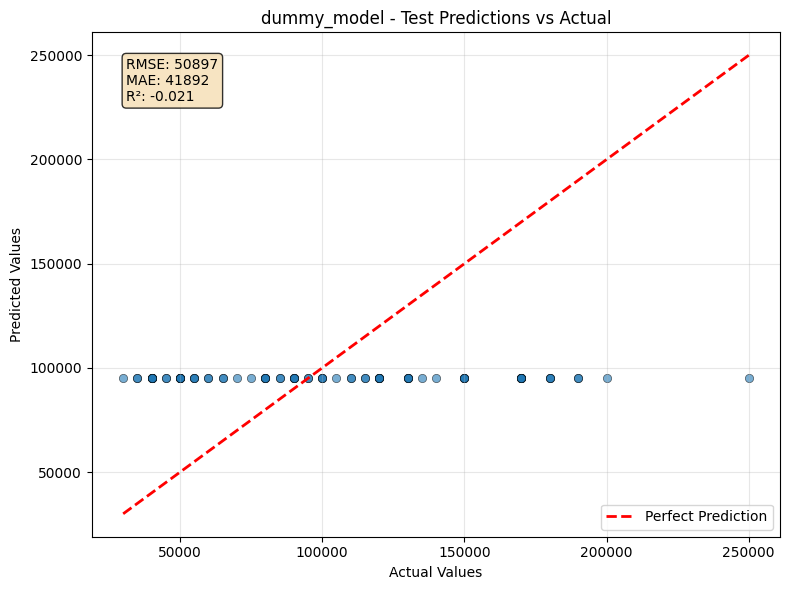

In [9]:
# Evaluate and plot
#print("Dummy Model Metrics:", dummy.evaluate(X_test, y_test))
dummy.plot_predictions(X_test, y_test, 'Test')


---

# Linear Regression

- Approaches. 
  - Ordinary Least Squares (OLS)
  - Gradient Descent
- Assumptions.
    - Linearity
    - Independence
    - Homoscedasticity
    - Normality of errors
- Evaluation metrics.
    - R-squared
    - Adjusted R-squared
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
- Regularization.
    - Lasso Regression (L1 regularization)
    - Ridge Regression (L2 regularization)



In [10]:
from src.models import LinearModel

### Basic OLS

In [11]:
# Basic OLS without feature selection
ols_basic = LinearModel(algorithm='ols')
ols_basic.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 142.11)
Removed feature_12 (VIF: 28.11)
Removed feature_2 (VIF: 15.20)
Removed feature_1 (VIF: 14.26)
Removed feature_3 (VIF: 11.67)
Removed feature_4 (VIF: 6.43)
After VIF check: 21 features


In [12]:
# Evaluate
metrics_ols = ols_basic.evaluate(X_test, y_test)
metrics_ols


,metric,point_estimate,95%_CI
0,RMSE,22742.421211,"(16023.040, 31745.199)"
1,MAE,16157.206212,"(12711.148, 20895.836)"
2,R2,0.796153,"(0.681, 0.884)"


In [13]:
# Model info
info = ols_basic.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 21


In [14]:
feature_imp = ols_basic.get_feature_importance()
feature_imp


,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,52118.228613,52118.228613
17,cat__Role_Leadership,48381.348693,48381.348693
5,cat__Seniority_Junior,-46552.776458,46552.776458
19,cat__Role_Sales/Marketing,44815.661276,44815.661276
4,cat__Seniority_Director,25441.559303,25441.559303
18,cat__Role_Management,14405.259107,14405.259107
2,cat__Education Level_Master's,13822.022604,13822.022604
16,cat__Role_Individual Contributor,-8644.393008,8644.393008
9,cat__Area_Other,-8405.113537,8405.113537
8,cat__Area_Management,-6773.907735,6773.907735


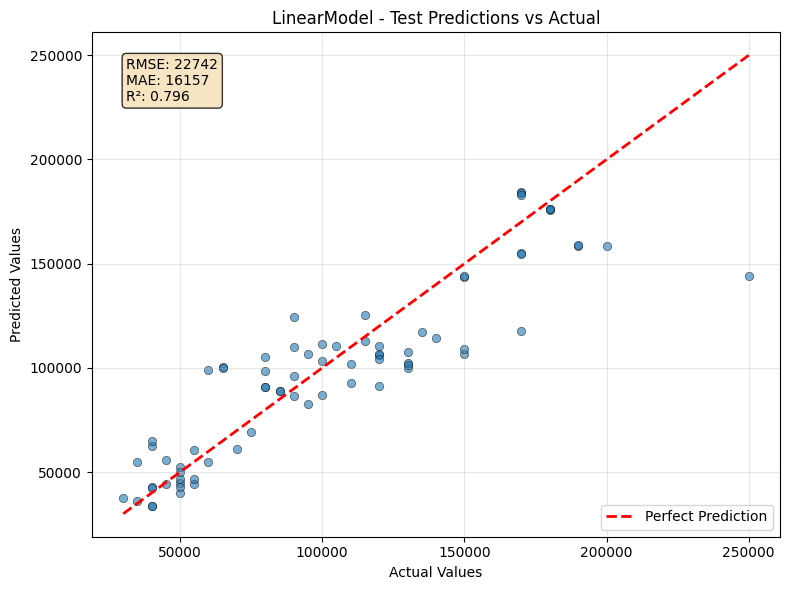

In [15]:
ols_basic.plot_predictions(X_test, y_test, 'Test')

---

### SGD Regression


In [16]:
sgd_reg = LinearModel(algorithm='sgd')
sgd_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 142.11)
Removed feature_12 (VIF: 28.11)
Removed feature_2 (VIF: 15.20)
Removed feature_1 (VIF: 14.26)
Removed feature_3 (VIF: 11.67)
Removed feature_4 (VIF: 6.43)
After VIF check: 21 features


In [17]:
# Evaluate
metrics_sgd = sgd_reg.evaluate(X_test, y_test)
metrics_sgd


,metric,point_estimate,95%_CI
0,RMSE,23518.594064,"(17758.204, 32870.980)"
1,MAE,16752.630824,"(13495.270, 21732.278)"
2,R2,0.782002,"(0.669, 0.869)"


In [18]:
feature_imp_sgd = sgd_reg.get_feature_importance()
feature_imp_sgd

,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,53531.086348,53531.086348
5,cat__Seniority_Junior,-46208.585274,46208.585274
17,cat__Role_Leadership,43315.431039,43315.431039
4,cat__Seniority_Director,30005.205152,30005.205152
19,cat__Role_Sales/Marketing,28763.932670,28763.932670
2,cat__Education Level_Master's,14659.179644,14659.179644
18,cat__Role_Management,12451.476244,12451.476244
13,cat__Area_Software/data,10473.855871,10473.855871
16,cat__Role_Individual Contributor,-8781.798297,8781.798297
10,cat__Area_People & Support,6701.873043,6701.873043


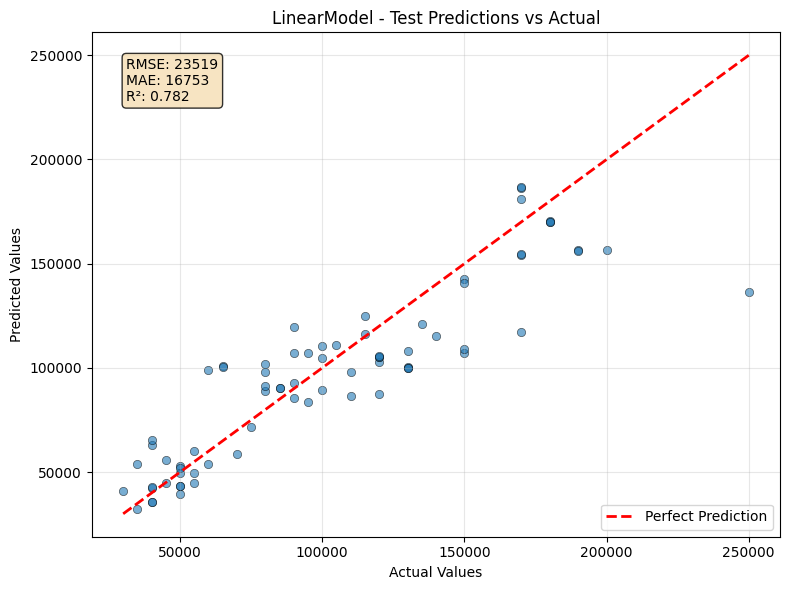

In [19]:
sgd_reg.plot_predictions(X_test, y_test, 'Test')

---

### Lasso Regression

In [20]:
lasso_reg = LinearModel(algorithm='lasso', alpha = 100, k_best=15)
lasso_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
Selected 15 best features from 27 features
After k-best selection: 15 features
Removed feature_0 (VIF: 133.26)
Removed feature_8 (VIF: 15.91)
Removed feature_1 (VIF: 10.52)
Removed feature_2 (VIF: 7.07)
After VIF check: 11 features


In [21]:
metrics_lasso = lasso_reg.evaluate(X_test, y_test)
metrics_lasso


,metric,point_estimate,95%_CI
0,RMSE,23538.624446,"(17615.667, 30955.821)"
1,MAE,16780.131903,"(13066.944, 21193.751)"
2,R2,0.781630,"(0.673, 0.861)"


In [22]:
# Model info
info = lasso_reg.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 11


In [23]:
feature_imp_lasso = lasso_reg.get_feature_importance()
feature_imp_lasso

,feature,coefficient,abs_coefficient
4,cat__Seniority_Junior,-50092.206352,50092.206352
2,cat__Education Level_PhD,44590.954249,44590.954249
8,cat__Role_Leadership,40684.787242,40684.787242
9,cat__Role_Sales/Marketing,28321.441345,28321.441345
3,cat__Seniority_Director,27130.896683,27130.896683
7,cat__Role_Individual Contributor,-14059.563678,14059.563678
1,cat__Education Level_Master's,12025.591327,12025.591327
10,cat__Role_Support,-10973.221590,10973.221590
5,cat__Area_Software/data,5841.816705,5841.816705
6,cat__Role_Engineer,-1961.936305,1961.936305


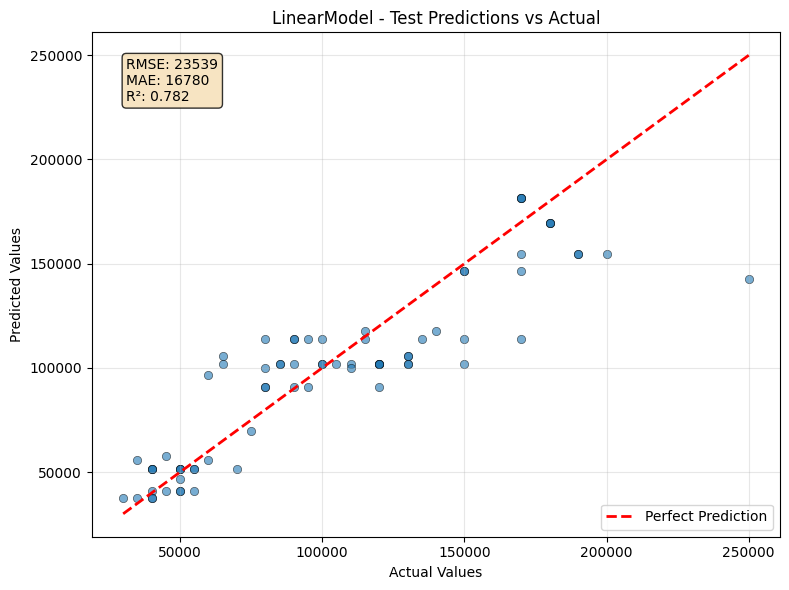

In [24]:
lasso_reg.plot_predictions(X_test, y_test, 'Test')

In [25]:
lasso_reg.get_model_info()

{'model_type': 'LinearModel',
 'is_fitted': True,
 'model_params': {'alpha': 100,
  'algorithm': 'lasso',
  'vif_threshold': 5.0,
  'k_best': 15},
 'n_features_after_encoding': 27,
 'n_features_after_kbest': 15,
 'n_features_final': 11,
 'n_numerical_features_scaled': 6,
 'n_onehot_features_not_scaled': 21,
 'features_removed_by_kbest': 12,
 'features_removed_by_vif': 4}

---

# Decision Tree with Cross-Validation

Testing the new cross-validation functionality in DecisionTree model.

In [26]:
from src.models import DecisionTree

### Regular Training

In [27]:
# Create decision tree with ordinal mappings
ordinal_mappings = {
    'Education Level': ["Bachelor's", "Master's", 'PhD'],
    'Seniority': ['Junior', 'Senior', 'Principal','Director', 'C-level']
}

dt_regular = DecisionTree(normalize=True, ordinal_mappings=ordinal_mappings, max_depth=10)


In [28]:
dt_regular.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. fit()
  4. get_feature_importance()
  5. get_model_info()
  6. grid_search()
  7. list_methods()
  8. plot_predictions()
  9. predict()


['cross_validate',
 'evaluate',
 'fit',
 'get_feature_importance',
 'get_model_info',
 'grid_search',
 'list_methods',
 'plot_predictions',
 'predict']

In [29]:
dt_regular.fit(X_train, y_train)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [30]:
# Evaluate on test set
metrics_dt = dt_regular.evaluate(X_test, y_test)
metrics_dt

,metric,point_estimate,95%_CI
0,RMSE,18069.644682,"(13915.156, 22370.414)"
1,MAE,12291.666667,"(9108.757, 15787.871)"
2,R2,0.871315,"(0.778, 0.929)"


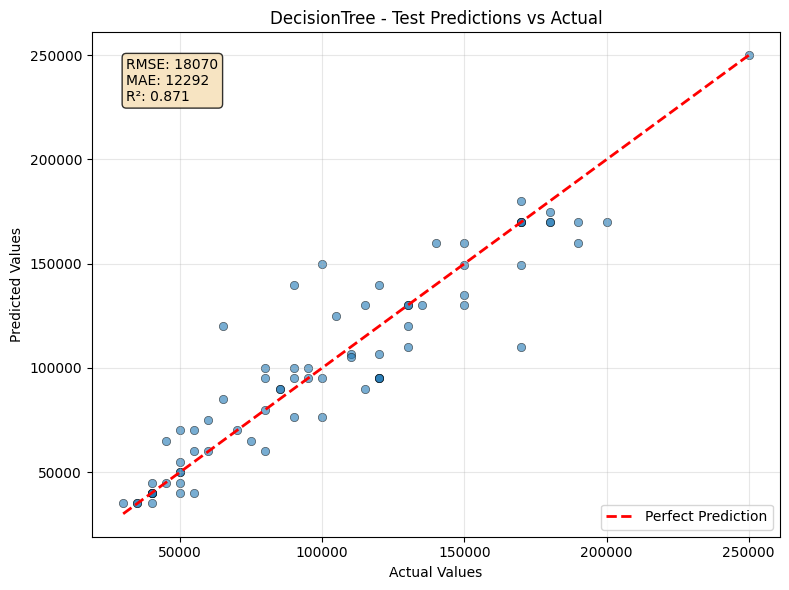

In [31]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

### Cross-Validation

In [39]:
# Same model but using cross-validation with RMSE
cv_results = dt_regular.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 20030.05 (±2025.34)
  Individual fold scores: ['20307.80', '22787.59', '21442.80', '17120.26', '18491.81']


In [33]:
# Compare with R² scoring
cv_results_r2 = dt_cv.cross_validate(X_train, y_train, cv=5, scoring='r2')
print(f"\nCV Results Summary:")
print(f"RMSE: {cv_results['mean_score']:.0f} (±{cv_results['std_score']:.0f})")
print(f"R²: {cv_results_r2['mean_score']:.3f} (±{cv_results_r2['std_score']:.3f})")

Cross-Validation Results (5-fold):
  R²: 0.82 (±0.05)
  Individual fold scores: ['0.84', '0.72', '0.83', '0.86', '0.84']

CV Results Summary:
RMSE: 20127 (±1888)
R²: 0.816 (±0.048)


In [34]:
# Feature importance (need to fit the model first for this)
dt_cv.fit(X_train, y_train)
feature_imp_dt = dt_cv.get_feature_importance()
print("Top 10 most important features:")
feature_imp_dt.head(10)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
Top 10 most important features:


,feature,importance
2,num__Age,0.690620
3,num__Years of Experience,0.180774
1,ord_Seniority__Seniority,0.049605
0,ord_Education Level__Education Level,0.015834
19,cat__Role_Leadership,0.012522
5,num__verb_count,0.006883
8,cat__Gender_Male,0.006633
6,num__adj_count,0.005886
20,cat__Role_Management,0.005726
4,num__noun_count,0.005572


### Grid Search

In [35]:
dt_gs = DecisionTree(normalize=False, ordinal_mappings=ordinal_mappings, max_depth=10)
dt_gs.grid_search(X_train, y_train)

Best score: 15530.24
Best params: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 20}
Updated parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Model parameters updated with best found parameters.
You can now use fit() or cross_validate() with the optimized parameters.


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__ccp_alpha': [0.0, 0.01, ...], 'regressor__max_depth': [3, 5, ...], 'regressor__max_features': ['sqrt', 'log2', ...], 'regressor__min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord_Education Level', ...), ('ord_Seniority', ...), ...]"


In [36]:
dt_gs.fit(X_train, y_train)

After preprocessing: 23 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6


In [37]:
dt_gs.evaluate(X_test, y_test)

,metric,point_estimate,95%_CI
0,RMSE,18210.861036,"(13352.407, 23526.658)"
1,MAE,12605.368624,"(9875.334, 15737.494)"
2,R2,0.869295,"(0.794, 0.923)"
